In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

news = pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2.csv")
mails = pd.read_csv(r"D:\TFG\tfg_git\data\mails\corpus_v2.0.csv")

In [63]:
# numero de palabras distintas. 
palabras = []
for i in range(len(news.clean_text)): 
    palabras.append(news.clean_text[i].split(" "))



In [ ]:
unique_palabras = 
print(unique_palabras)

In [ ]:
####3

In [11]:
news_candidates =pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2_candidates.csv")
news_trump = pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2_trump.csv")

In [13]:
print(len(news))
print(len(news_candidates))
print(len(news_trump))
print("....")
print(len(news_candidates) + len(news_trump))

26501
13902
12599
....
26501


In [14]:
nwords_news = []
for i in range(len(news)): 
    nwords_news.append(len(news.clean_text[i].split(" ")))
    
nwords_mails = []
for i in range(len(mails)): 
    nwords_mails.append(len(mails.clean_text[i].split(" ")))

In [15]:
print(len(nwords_news))
print(len(nwords_mails))

26501
668


In [18]:
np.min(nwords_news)

14

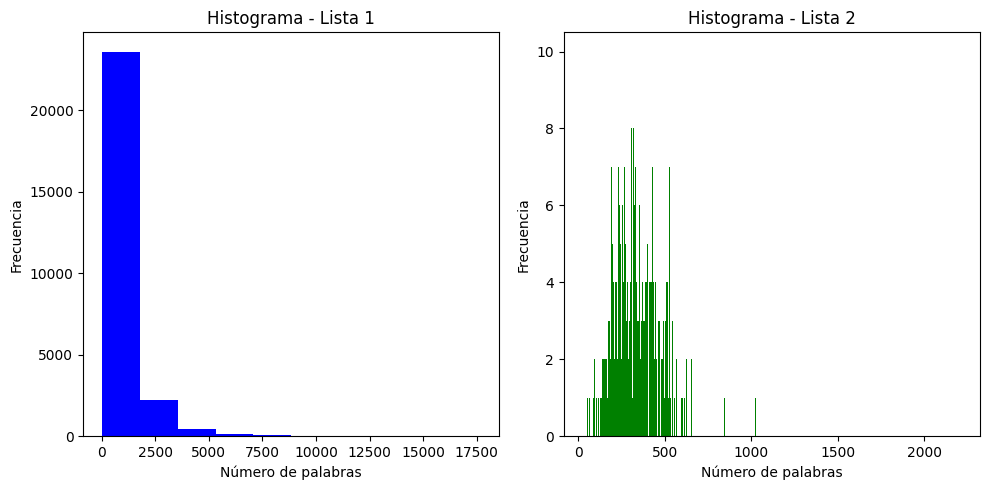

In [17]:
import matplotlib.pyplot as plt

# Listas con el número de palabras de dos corpus distintos
lista1 =nwords_news
lista2 = nwords_mails

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Subplot 1 - Histograma de la lista 1
ax1.hist(lista1, bins=10, color='blue')
ax1.set_title('Histograma - Lista 1')
ax1.set_xlabel('Número de palabras')
ax1.set_ylabel('Frecuencia')

# Subplot 2 - Histograma de la lista 2
ax2.hist(lista2, bins=1000, color='green')
ax2.set_title('Histograma - Lista 2')
ax2.set_xlabel('Número de palabras')
ax2.set_ylabel('Frecuencia')

# Ajustar los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


In [19]:
import numpy as np
from scipy import stats

def stats_from_list(lista):
    # Cálculo de las estadísticas básicas
    minimo = np.min(lista)
    maximo = np.max(lista)
    media = np.mean(lista)
    mediana = np.median(lista)
    percentil_25 = np.percentile(lista, 25)
    percentil_75 = np.percentile(lista, 75)
    ric = percentil_75 - percentil_25
    moda = stats.mode(lista).mode[0]
    
    estadisticas = [minimo,maximo, media, mediana, percentil_25, percentil_75, ric, moda]
    
    return estadisticas

In [21]:
stats_from_list(nwords_news)

C:\Users\User\AppData\Local\Temp\ipykernel_25216\3005310934.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(lista).mode[0]


[14, 17674, 1073.1902947058602, 842.0, 551.0, 1221.0, 670.0, 651]

In [24]:
#noticias
stats_news = stats_from_list(nwords_news)
stats_mails = stats_from_list(nwords_mails)



full_lists_news = [stats_news, stats_mails]
nombres_columnas = ['minimo', 'maximo', 'media', "mediana", "percentil25", "percentil75", "RIC", "moda"]
df = pd.DataFrame(full_lists_news, columns=nombres_columnas)
df

C:\Users\User\AppData\Local\Temp\ipykernel_25216\3005310934.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(lista).mode[0]


,minimo,maximo,media,mediana,percentil25,percentil75,RIC,moda
0,14,17674,1073.190295,842.0,551.00,1221.0,670.00,651
1,26,2213,351.300898,323.0,240.75,446.0,205.25,233


In [26]:
df.drop(["RIC", "moda"], axis=1)

,minimo,maximo,media,mediana,percentil25,percentil75
0,14,17674,1073.190295,842.0,551.00,1221.0
1,26,2213,351.300898,323.0,240.75,446.0


In [27]:
print(df.drop(["RIC", "moda"], axis=1).to_string(index=False))


 minimo  maximo       media  mediana  percentil25  percentil75
     14   17674 1073.190295    842.0       551.00       1221.0
     26    2213  351.300898    323.0       240.75        446.0


In [28]:
## Histograma del modelo despues de procesar: 

news_processed = pd.read_csv(r"D:\TFG\tfg_git\data\processed\news_processed")


In [30]:
news_processed_final = news_processed.ctext.tolist()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


coun_vect = CountVectorizer(max_df=0.99, min_df=0.01)
count_matrix = coun_vect.fit_transform(news_processed_final)

In [36]:
count_matrix = pd.DataFrame(count_matrix.toarray(), columns=coun_vect.get_feature_names_out())


In [37]:
count_matrix.shape

(26501, 2711)

In [43]:
from scipy.sparse import find

feature_names = count_matrix.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists = []
for row in range(count_matrix.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(count_matrix.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists.append(len(words))

word_lists_news = word_lists

In [59]:
len(word_lists_news)

26501

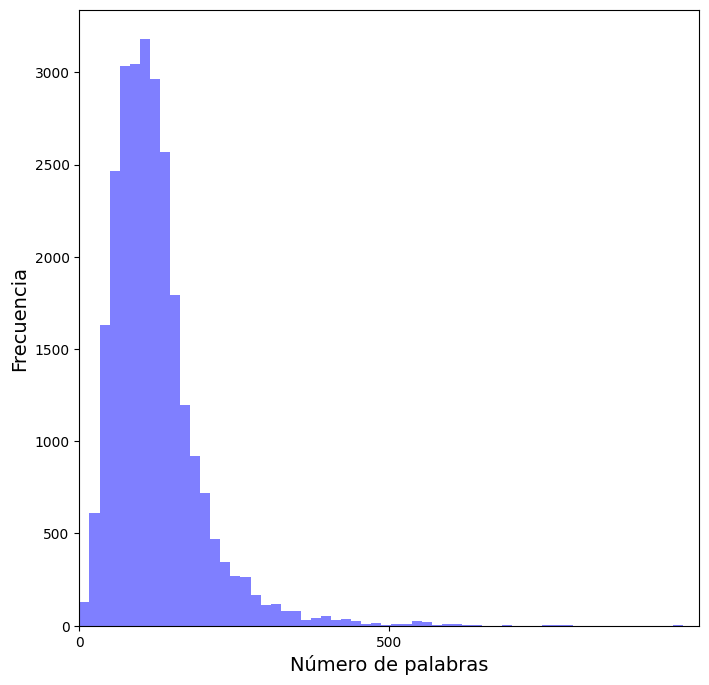

In [58]:
import matplotlib.pyplot as plt

# crear figura y subplot
fig, ax = plt.subplots(figsize=(8, 8))

# trazar el histograma
ax.hist(word_lists_news, bins=60, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_xlabel('Número de palabras', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)

# establecer límites en el eje x y ajustar las marcas de graduación
ax.set_xlim(0, 1000)
ax.set_xticks(range(0, 1000, 500))

# mostrar el gráfico
plt.show()


In [47]:
np.mean(word_lists_news)

121.67620089807932

In [60]:
np.mean(nwords_news)

1073.1902947058602

In [66]:
# histograma de los valores promedio de la matriz tfidf

tfidf = pd.read_csv(r"D:\TFG\tfg_git\data\tfidf\news.csv")

In [71]:
promedios_tfidf = tfidf.mean().tolist()

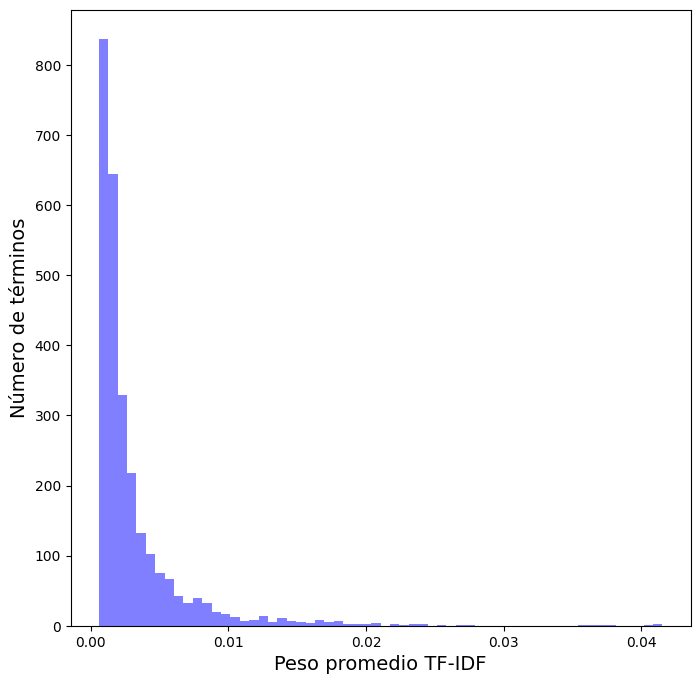

In [74]:
import matplotlib.pyplot as plt

# crear figura y subplot
fig, ax = plt.subplots(figsize=(8, 8))

# trazar el histograma
ax.hist(promedios_tfidf, bins=60, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_xlabel('Peso promedio TF-IDF', fontsize=14)
ax.set_ylabel('Número de términos', fontsize=14)



# mostrar el gráfico
plt.show()


In [76]:
# Calcular las medias de las columnas
column_means = tfidf.mean()
# Obtener los nombres de las 10 columnas con la media más alta
top_10_columns = column_means.nlargest(10).index
top_10_columns

Index(['people', 'candidate', 'state', 'year', 'president', 'voter',
       'campaign', 'country', 'time', 'election'],
      dtype='object')